In [2]:
%matplotlib inline


Histogram segmentation
======================

This example does simple histogram analysis to perform segmentation.



In [3]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel
import skimage
import warnings
warnings.filterwarnings("ignore")

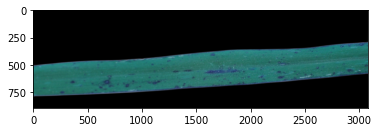

In [23]:
image=Image.open('rld_img_rembg/ls/DSC_0308.jpg')
# image=image.resize((320,225))
image=np.array(image)
plt.imshow(image)


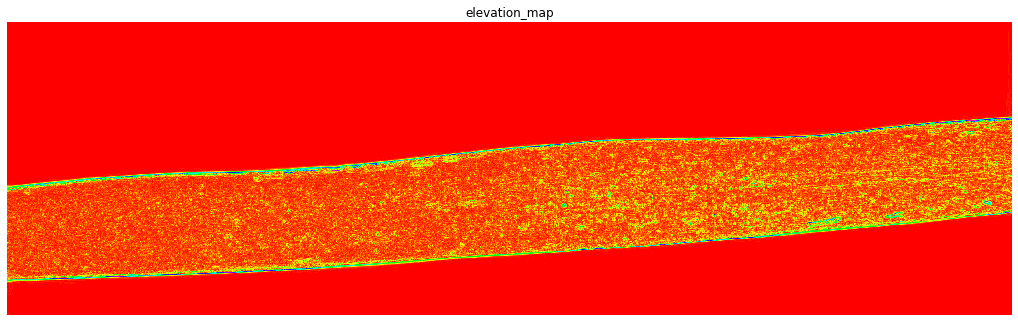

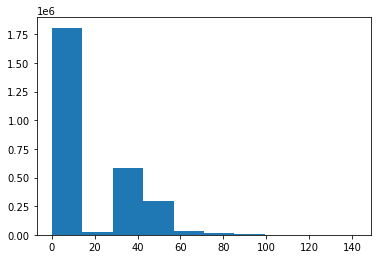

In [24]:
imm=image[:,:,0]
elevation_map = sobel(imm)

fig, ax = plt.subplots(figsize=(18,8))
ax.imshow(elevation_map, cmap='hsv', interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')
plt.show()


# plt.imshow(gray_segmented_2,cmap='gray')
plt.hist(imm.flatten())
plt.show()


(-0.5, 3080.5, 896.5, -0.5)

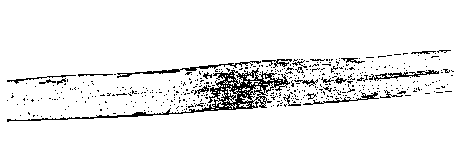

In [33]:
mask_path = "mask/blb/"
markers = np.zeros_like(imm)
markers[imm < 100] = 2
markers[imm > 45] = 1


# "Paired", "Paired_r", "Spectral", "Spectral_r", "flag", "flag_r", "tab10"
cmapps = ["Paired", "Paired_r", "Spectral", "Spectral_r", "flag", "flag_r", "tab10", "gray"]
# image = plt.imread("example.png")

for i in range(len(cmapps)):
    plt.imsave(mask_path + cmapps[i]+'.jpg', markers, cmap=str(cmapps[i])) #use colormap

fig, ax = plt.subplots(figsize=(8,4))
ax.imshow(markers, cmap='gray', interpolation='nearest')
ax.axis('off')
# ax.set_title('markers')

# cv2.imwrite("rld_img_proc/blb/marker.jpg", markers)



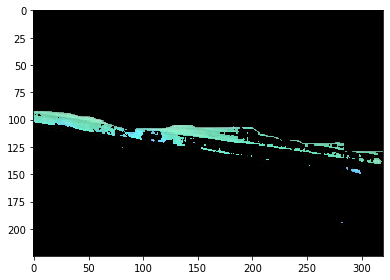

In [7]:
maskImg = Image.open("mask/blb/gray.jpg")
# skimage.io.imshow(maskImg)

maskImg = maskImg.resize((320,225))

# maskImg = cv2.cvtColor(maskImg, cv2.COLOR_BGR2GRAY)
# skimage.io.imshow(maskImg)


maskImg = np.array(maskImg)


res = cv2.bitwise_and(image, maskImg)

skimage.io.imshow(res)